In [ ]:
import sympy as sp

Re, R2, Le, L2, Bl, Mm, Km, Rm = sp.symbols('R_e R_2 L_e L_2 Bl M_m K_m R_m')
i, i2, x_disp, v = sp.symbols('i i_2 x v')
Voltage = sp.symbols('V_in')

# state vector
x_vec = sp.Matrix([
    [i],
    [i2],
    [x_disp],
    [v]
])

# system matrix F
F = sp.Matrix([
    [-(Re + R2)/Le,  R2/Le,    0,     -Bl/Le],
    [R2/L2,          -R2/L2,   0,     0     ],
    [0,              0,        0,     1     ],
    [Bl/Mm,          0,        -Km/Mm, -Rm/Mm]
])

# input matrix G
G = sp.Matrix([
    [1/Le],
    [0],
    [0],
    [0]
])

# symbolic
dxdt = F * x_vec + G * Voltage

print("eq 0 ")
sp.pprint(sp.simplify(dxdt[0]))

print("eq 1")
sp.pprint(sp.simplify(dxdt[1]))

print("eq 2")
sp.pprint(sp.simplify(dxdt[2]))

print("eq 3")
sp.pprint(sp.simplify(dxdt[3]))

eq 0 
-Bl⋅v + R₂⋅i₂ + Vᵢₙ - i⋅(R₂ + Rₑ)
─────────────────────────────────
               Lₑ                
eq 1
R₂⋅(i - i₂)
───────────
    L₂     
eq 2
v
eq 3
Bl⋅i - Kₘ⋅x - Rₘ⋅v
──────────────────
        Mₘ        


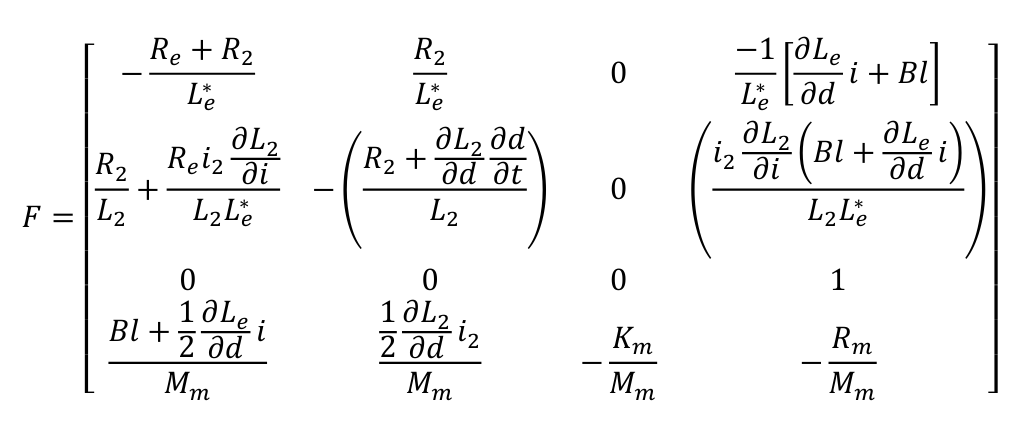

In [ ]:
import sympy as sp

Re, R2, Le, Le_star, L2, Bl, Mm, Km, Rm = sp.symbols('R_e R_2 L_e L_e_star L_2 Bl M_m K_m R_m')
Voltage = sp.symbols('V_in')

i, i2, d, v = sp.symbols('i i_2 d v')

# partial derivatives
dLe_dd = sp.symbols('dL_e/dd')  
dL2_di = sp.symbols('dL_2/di')  
dL2_dd = sp.symbols('dL_2/dd')  

# state vec
x_vec = sp.Matrix([
    [i],
    [i2],
    [d],
    [v]
])

# partial d / partial t = vel

r0c0 = -(Re + R2) / Le_star
r0c1 = R2 / Le_star
r0c2 = 0
r0c3 = (-1 / Le_star) * (dLe_dd * i + Bl)

r1c0 = (R2 / L2) + ( (Re * i2 * dL2_di) / (L2 * Le_star) )
r1c1 = -(R2 + dL2_dd * v) / L2   
r1c2 = 0
r1c3 = ( i2 * dL2_di * (Bl + dLe_dd * i) ) / (L2 * Le_star)

r2c0, r2c1, r2c2, r2c3 = 0, 0, 0, 1

r3c0 = (Bl + sp.Rational(1,2) * dLe_dd * i) / Mm
r3c1 = (sp.Rational(1,2) * dL2_dd * i2) / Mm
r3c2 = -Km / Mm
r3c3 = -Rm / Mm

F = sp.Matrix([
    [r0c0, r0c1, r0c2, r0c3],
    [r1c0, r1c1, r1c2, r1c3],
    [r2c0, r2c1, r2c2, r2c3],
    [r3c0, r3c1, r3c2, r3c3]
])


g0 = 1 / Le_star
g1 = -( i2 * dL2_di ) / (L2 * Le_star)
g2 = 0
g3 = 0

G = sp.Matrix([
    [g0],
    [g1],
    [g2],
    [g3]
])


dxdt = F * x_vec + G * Voltage

didt = (R_2*i_2 + V_in - i*(R_2 + R_e) - v*(Bl + dL_e/dd*i))/L_e_star
di2dt = (-L_e_star*i_2*(R_2 + dL_2/dd*v) + dL_2/di*i_2*(-V_in + v*(Bl + dL_e/dd*i)) + i*(L_e_star*R_2 + R_e*dL_2/di*i_2))/(L_2*L_e_star)
ddisp_dt = v
dvdt = (-K_m*d - R_m*v + dL_2/dd*i_2**2/2 + i*(2*Bl + dL_e/dd*i)/2)/M_m


print("--- eq 0 ---")
print(sp.simplify(dxdt[0]))
print("\n")

print("--- eq 1 ---")
print(sp.simplify(dxdt[1]))
print("\n")

print("--- eq 2 ---")
print(sp.simplify(dxdt[2]))
print("\n")

print("--- eq 3 ---")
print(sp.simplify(dxdt[3]))

--- eq 0 ---
(R_2*i_2 + V_in - i*(R_2 + R_e) - v*(Bl + dL_e/dd*i))/L_e_star


--- eq 1 ---
(-L_e_star*i_2*(R_2 + dL_2/dd*v) + dL_2/di*i_2*(-V_in + v*(Bl + dL_e/dd*i)) + i*(L_e_star*R_2 + R_e*dL_2/di*i_2))/(L_2*L_e_star)


--- eq 2 ---
v


--- eq 3 ---
(-K_m*d - R_m*v + dL_2/dd*i_2**2/2 + i*(2*Bl + dL_e/dd*i)/2)/M_m
